In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants as cst
from datetime import timedelta, datetime, timezone
from matplotlib.colors import LogNorm, SymLogNorm, Normalize
from scipy.ndimage import gaussian_filter as gf


from scipy import stats

from multiprocess import Pool 



from spok.models import planetary as smp
from spok import smath as sm
from spok.coordinates import coordinates as scc
from spok import utils as su


from skimage.feature import hessian_matrix,hessian_matrix_eigvals
from scipy.interpolate import griddata

from sklearn.neighbors import KNeighborsRegressor

import speasy as spz
from speasy.products import SpeasyVariable
from typing import List

import spacepy.omni as spo

In [14]:
# Reading Data from the Pickle files
# Data from magnetosheath
data_ms = pd.read_pickle('./Datasets/data_gsm_v2.pkl') 

# Data from before the bow shock
data_bs = pd.read_pickle('./Datasets/all_sat_SW_data.pkl')

In [15]:
# Load omni
omni1_resampled = pd.read_pickle('./Datasets/omni1_resampled.pkl')
omni2_resampled = pd.read_pickle('./Datasets/omni2_resampled.pkl')

In [5]:
# Resampling omni2 to match the time index of data
omni2_ms = omni2_resampled.loc[data_ms['time'].values]
omni2_ms = omni2_ms.reset_index()
omni2_ms.rename(columns={'index': 'time'}, inplace=True)
print("Shape:", omni2_ms.shape)  # (rows, columns)
print("Number of elements:", omni2_ms.size)
print("Data_ms Shape:", data_ms.shape)  # (rows, columns)
print("Data_ms Number of elements:", data_ms.size)

Shape: (44897857, 14)
Number of elements: 628569998


In [6]:
omni1_ms = omni1_resampled.loc[data_ms['time'].values]
omni1_ms = omni1_ms.reset_index()
omni1_ms.rename(columns={'index': 'time'}, inplace=True)
print("OMNI1 Shape:", omni1_ms.shape)  # (rows, columns)
print("OMNI1 Number of elements:", omni1_ms.size)
print("Data_ms Shape:", data_ms.shape)  # (rows, columns)
print("Data_ms Number of elements:", data_ms.size)

OMNI1 Shape: (44897857, 14)
OMNI1 Number of elements: 628569998
Data_ms Shape: (44897857, 13)
Data_ms Number of elements: 583672141


In [17]:
# Resampling omni2 to match the time index of data_bs
omni2_bs = omni2_resampled.loc[data_bs['time'].values]
omni2_bs = omni2_bs.reset_index()
omni2_bs.rename(columns={'index': 'time'}, inplace=True)
print("OMNI2 Shape:", omni2_bs.shape)  # (rows, columns)
print("OMNI2 Number of elements:", omni2_bs.size)
print("Data_bs Shape:", data_bs.shape)  # (rows, columns)
print("Data_bs Number of elements:", data_bs.size)

OMNI2 Shape: (17034753, 14)
OMNI2 Number of elements: 238486542
Data_bs Shape: (17034753, 13)
Data_bs Number of elements: 221451789


In [18]:
omni1_bs = omni1_resampled.loc[data_bs['time'].values]
omni1_bs = omni1_bs.reset_index()
omni1_bs.rename(columns={'index': 'time'}, inplace=True)
print("OMNI1 Shape:", omni2_bs.shape)  # (rows, columns)
print("OMNI1 Number of elements:", omni2_bs.size)
print("Data_bs Shape:", data_bs.shape)  # (rows, columns)
print("Data_bs Number of elements:", data_bs.size)

OMNI1 Shape: (17034753, 14)
OMNI1 Number of elements: 238486542
Data_bs Shape: (17034753, 13)
Data_bs Number of elements: 221451789


In [19]:
 # Save dataframes of omni1 and omni2 as pickle files
omni1_bs.to_pickle('./Datasets/omni1_bs.pkl')
omni2_bs.to_pickle('./Datasets/omni2_bs.pkl')


In [ ]:
omni1_ms.to_pickle('./Datasets/omni1_ms.pkl')
omni2_ms.to_pickle('./Datasets/omni2_ms.pkl')

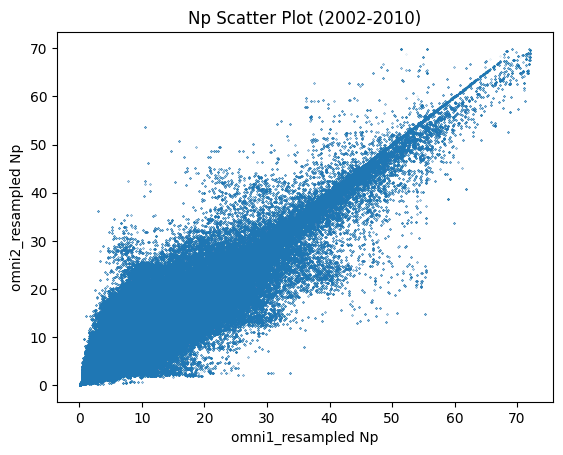

In [12]:
# Filter data between 2002 and 2004
start = '2002-01-01'
end = '2010-12-31'
np1 = omni1_resampled.loc[start:end, 'Np']
np2 = omni2_resampled.loc[start:end, 'Np']

plt.figure()
plt.scatter(np1, np2, marker='.', alpha=0.5, s=0.1)
plt.xlabel('omni1_resampled Np')
plt.ylabel('omni2_resampled Np')
plt.title('Np Scatter Plot (2002-2010)')
plt.show()
plt.close()

# ...existing code...